<a href="https://colab.research.google.com/github/vaishaliraut/DeepLearningDemo/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Keras


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1 : Read the Dataset


In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"

df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
# Step 2 : Basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.duplicated().sum()

41

In [7]:
df = df.drop_duplicates(keep='first')

# Step 3 : Seperate X and Y (PE)

In [8]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [9]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [10]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4 : Perform preprocessing on X

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [12]:
from re import S
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]).set_output(transform='pandas')

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837
...,...,...,...,...
9563,-0.609648,-0.423583,-0.241925,-0.027724
9564,1.847362,1.864831,-0.494441,-0.932100
9565,-0.492776,-0.863450,0.162101,0.364561
9566,-0.269777,0.439598,0.899448,1.459261


# Step 5: Apply train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [15]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [16]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [17]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [18]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [19]:
xtrain.shape

(7621, 4)

In [20]:
xtest.shape

(1906, 4)

# Step 6 : Build the neural network

In [21]:
from keras.models import Sequential
from keras.layers import Dense , Input

In [22]:
# initialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add hidden Dense Layer 1
model.add(Dense(16, activation='relu'))

# Add hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))


In [23]:
# Compile the model

model.compile(loss='mse', metrics=['mae'], optimizer='adam')

In [24]:
hist = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=60)

Epoch 1/60
239/239 [==============================] - 7s 8ms/step - loss: 204171.6562 - mae: 451.5244 - val_loss: 198924.7969 - val_mae: 445.6511
Epoch 2/60
239/239 [==============================] - 2s 7ms/step - loss: 179046.3906 - mae: 422.2072 - val_loss: 147135.5000 - val_mae: 382.4721
Epoch 3/60
239/239 [==============================] - 2s 7ms/step - loss: 102875.0547 - mae: 313.7056 - val_loss: 58178.9102 - val_mae: 229.6622
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 35318.8125 - mae: 166.1294 - val_loss: 20604.9590 - val_mae: 121.6262
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 17470.6035 - mae: 112.3130 - val_loss: 14168.1113 - val_mae: 100.6375
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 12437.0059 - mae: 94.4810 - val_loss: 10148.8779 - val_mae: 85.0166
Epoch 7/60
239/239 [==============================] - 1s 5ms/step - loss: 8695.8682 - mae: 79.0284 - val_loss: 6906.5210 - val_mae: 7

In [25]:
hist.history["loss"]

[204171.65625,
 179046.390625,
 102875.0546875,
 35318.8125,
 17470.603515625,
 12437.005859375,
 8695.8681640625,
 5799.8291015625,
 3673.341552734375,
 2261.46728515625,
 1427.3883056640625,
 944.2628784179688,
 653.2203979492188,
 467.1722106933594,
 341.1340637207031,
 255.22874450683594,
 193.91810607910156,
 149.96878051757812,
 117.32291412353516,
 93.50511169433594,
 76.14798736572266,
 63.368019104003906,
 53.57155227661133,
 45.96368408203125,
 40.003082275390625,
 35.575687408447266,
 31.853567123413086,
 29.150863647460938,
 27.0457820892334,
 25.509868621826172,
 24.294586181640625,
 23.493207931518555,
 22.861051559448242,
 22.222543716430664,
 21.86019515991211,
 21.621990203857422,
 21.58613395690918,
 21.23432731628418,
 21.077573776245117,
 21.092655181884766,
 20.709758758544922,
 20.838768005371094,
 20.67060089111328,
 20.749589920043945,
 20.519426345825195,
 20.551620483398438,
 20.61461067199707,
 20.336048126220703,
 20.358631134033203,
 20.11526107788086,
 20.

In [26]:
hist.history["val_loss"]

[198924.796875,
 147135.5,
 58178.91015625,
 20604.958984375,
 14168.111328125,
 10148.8779296875,
 6906.52099609375,
 4445.89892578125,
 2735.2529296875,
 1698.5201416015625,
 1090.9266357421875,
 740.1597290039062,
 520.0836181640625,
 376.45208740234375,
 277.86358642578125,
 209.2680206298828,
 161.2452392578125,
 125.62134552001953,
 100.39649200439453,
 81.34931945800781,
 67.45214080810547,
 56.77598190307617,
 48.75710678100586,
 42.542781829833984,
 37.99946594238281,
 33.8516960144043,
 30.60561752319336,
 28.410076141357422,
 26.55508804321289,
 24.987300872802734,
 24.288549423217773,
 23.15269660949707,
 22.57789421081543,
 22.256357192993164,
 22.04869270324707,
 21.42803955078125,
 21.160932540893555,
 21.22035026550293,
 21.277482986450195,
 20.85477638244629,
 20.575477600097656,
 20.363027572631836,
 21.01534080505371,
 20.341514587402344,
 20.540037155151367,
 20.49065589904785,
 20.452802658081055,
 20.04474449157715,
 20.394821166992188,
 19.971363067626953,
 19.86

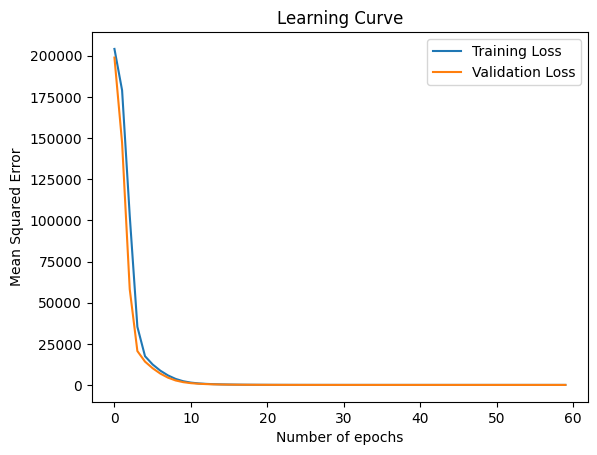

In [29]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label= "Validation Loss")
plt.xlabel("Number of epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [27]:
model.evaluate(xtrain, ytrain)

239/239 [==============================] - 1s 5ms/step - loss: 19.8094 - mae: 3.5013


[19.809398651123047, 3.5012803077697754]

In [28]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 2ms/step - loss: 19.8029 - mae: 3.5237


[19.802892684936523, 3.5237035751342773]

# Predict the results for train and test

In [30]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [31]:
ypred_train[0:5]

array([[451.92288],
       [478.6048 ],
       [468.9004 ],
       [432.84964],
       [467.51758]], dtype=float32)

In [32]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [33]:
ypred_test[0:5]

array([[429.51868],
       [481.38647],
       [483.27472],
       [450.65988],
       [447.3087 ]], dtype=float32)

In [34]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [35]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9310797639664332

In [36]:
# R2 score in test
from sklearn.metrics import r2_score
r2_score(ytest, ypred_test)

0.9343818163397388

# Because I have r2 score > 0.8 for both train and test I can use above model for out of sample predictions

In [38]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [39]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [40]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908
...,...,...,...,...
95,0.898948,1.197147,-0.805877,-0.196139
96,-1.058331,-1.129893,-0.314313,0.658261
97,-1.885843,-1.017956,1.291690,0.881445
98,0.712221,1.631496,-0.839546,0.491899


In [41]:
preds = model.predict(xnew_pre)
preds

4/4 [==============================] - 0s 4ms/step


array([[445.37903],
       [438.87408],
       [431.75256],
       [440.0194 ],
       [475.2789 ],
       [444.60904],
       [451.3965 ],
       [480.4306 ],
       [468.5217 ],
       [473.3617 ],
       [456.45874],
       [474.98523],
       [450.961  ],
       [434.9718 ],
       [433.7254 ],
       [431.46597],
       [452.17654],
       [466.10037],
       [444.02606],
       [429.27496],
       [432.84222],
       [470.9364 ],
       [481.12402],
       [434.29324],
       [463.75284],
       [442.28137],
       [434.4026 ],
       [434.1669 ],
       [441.94775],
       [447.9007 ],
       [481.14746],
       [467.32886],
       [436.7542 ],
       [442.48956],
       [434.9905 ],
       [442.1753 ],
       [464.7542 ],
       [472.3901 ],
       [435.72348],
       [478.24603],
       [453.23468],
       [452.1916 ],
       [484.5131 ],
       [432.58582],
       [460.0047 ],
       [440.8919 ],
       [455.66644],
       [449.58142],
       [460.61908],
       [458.0069 ],


In [42]:
xnew["PowerOutput_pred"] = preds

In [43]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,445.379028
1,28.88,54.89,1007.16,46.60,438.874084
2,27.89,73.21,1001.32,85.88,431.752563
3,25.69,62.26,1011.38,74.08,440.019409
4,12.16,40.81,1025.79,70.97,475.278900
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.642395
96,11.78,39.96,1011.37,82.95,472.006989
97,5.62,41.38,1020.91,86.21,484.798889
98,24.96,74.99,1008.25,80.52,436.397675


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

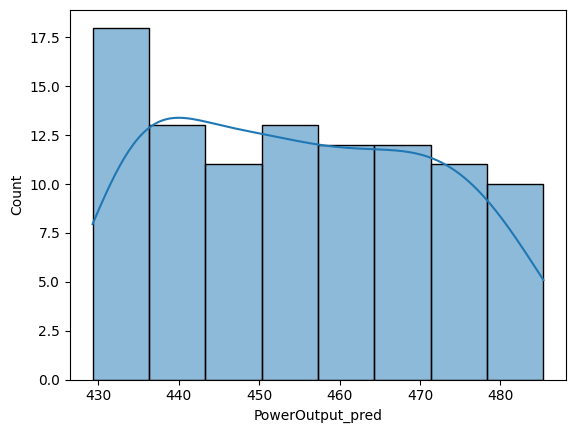

In [44]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [45]:
xnew.to_csv("Results.csv", index=False)